In [ ]:
#importing libraries and reading the data file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json


In [ ]:
#importing the dataset and exploring it
from google.colab import files
uploaded = files.upload()

Saving indianfood1.csv to indianfood1.csv


In [ ]:
df = pd.read_csv('indianfood1.csv')
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [ ]:
df.shape

(255, 9)

The dataset consists of about 255 Indian dishes and 9 columns
associated with each of them.


In [ ]:
df.head(10)


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1


In [ ]:
df.tail(10)


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
245,Pani Pitha,"Tea leaves, white sesame seeds, dry coconut, s...",vegetarian,10,20,-1,main course,Assam,North East
246,Payokh,"Basmati rice, rose water, sugar, clarified but...",vegetarian,-1,-1,sweet,dessert,Assam,North East
247,Prawn malai curry,"Coconut milk, prawns, garlic, turmeric, sugar",non vegetarian,15,50,spicy,main course,West Bengal,East
248,Red Rice,"Red pepper, red onion, butter, watercress, oli...",vegetarian,-1,-1,-1,main course,-1,-1
249,Shukto,"Green beans, bitter gourd, ridge gourd, banana...",vegetarian,10,20,spicy,main course,West Bengal,East
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central
254,Pinaca,"Brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West


Here we see that columns prep-time, cook-time ,flavour profile, state and
region do not have exact 255 not null values. This is because we have
converted them into NaN value. The reason behind these values not being
present in the data is that for example there are some dishes that are made all
over the country and do not have a specific state or region that they originate
from like Kaju katli.

In [ ]:
# Replace the -1 values with NaN values
df = df.replace(-1,np.nan)
df= df.replace('-1',np.nan)
df.head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10.0,50.0,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10.0,50.0,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10.0,20.0,sweet,dessert,NaN,NaN
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20.0,30.0,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10.0,40.0,sweet,dessert,NaN,NaN


In [ ]:
df.dtypes


name               object
ingredients        object
diet               object
prep_time         float64
cook_time         float64
flavor_profile     object
course             object
state              object
region             object
dtype: object

In [ ]:
#Out of these 9 columns: 2 are numeric features while 6 are categorical features

In [ ]:
df.columns


Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [ ]:
#Displaying the number of unique values in each column
df.nunique(axis=0)

name              255
ingredients       252
diet                2
prep_time          21
cook_time          18
flavor_profile      4
course              4
state              24
region              6
dtype: int64

In [ ]:
#Displaying the unique elements in categorical columns
df['diet'].unique()

array(['vegetarian', 'non vegetarian'], dtype=object)

In [ ]:
df['flavor_profile'].unique()

array(['sweet', 'spicy', 'bitter', nan, 'sour'], dtype=object)

In [ ]:
df['course'].unique()

array(['dessert', 'main course', 'starter', 'snack'], dtype=object)

In [ ]:
df['region'].unique()

array(['East', 'West', 'North', nan, 'North East', 'South', 'Central'],
      dtype=object)

In [ ]:
#Displaying the number of dishes from every state
dishes= df['state'].value_counts()
dishes.head(len(df['state'].unique()))

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Rajasthan           6
Karnataka           6
Telangana           5
Bihar               3
Goa                 3
Jammu & Kashmir     2
Madhya Pradesh      2
Manipur             2
Haryana             1
Uttarakhand         1
Tripura             1
Nagaland            1
NCT of Delhi        1
Chhattisgarh        1
Name: state, dtype: int64

In [ ]:
#Displaying the number of dishes from every region
dishes= df['region'].value_counts()
dishes.head(len(df['region'].unique()))

West          74
South         59
North         49
East          31
North East    25
Central        3
Name: region, dtype: int64

#Adding a new column that will count the number of ingredients from the
ingredients column for each dish.
(In the output of info()command we saw that the number of ingredients is 255
but this is just the counting of all ingredients as one for ech row)

In [ ]:
df['Number_of_ingredients'] = df['ingredients'].map(lambda x: len(x.split(',')))
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Number_of_ingredients
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,8


In [ ]:
# Adding a new column to calculate the total time taken to make every dish
df['totaltime'] = df['prep_time']+df['cook_time']
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Number_of_ingredients,totaltime
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,4,70.0
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,3,110.0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,6,75.0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,10,45.0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,8,55.0


In [ ]:
# Calculating the different parameters of the numeric features
df.describe()


,prep_time,cook_time,Number_of_ingredients,totaltime
count,225.000000,227.000000,255.000000,225.000000
mean,35.386667,38.911894,4.454902,74.111111
std,76.241081,49.421711,1.205681,95.450909
min,5.000000,2.000000,2.000000,10.000000
25%,10.000000,20.000000,4.000000,35.000000
50%,10.000000,30.000000,5.000000,50.000000
75%,20.000000,45.000000,5.000000,65.000000
max,500.000000,720.000000,10.000000,730.000000


: From these values we see that an average of 74 mins is required to
make every dish and an average of at least 5 ingredients goes into making
every dish in Indian cuisine.

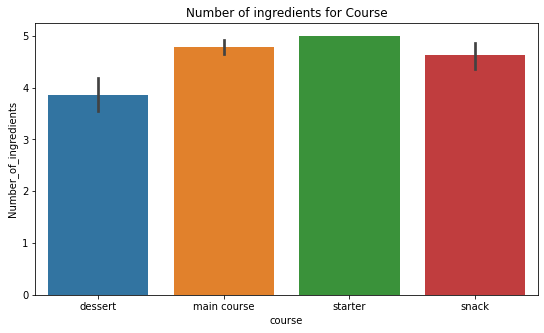

In [ ]:
# Number of ingredients used in each course
fig, axes = plt.subplots(figsize=(9,5))
sns.barplot(x='course', y='Number_of_ingredients',data=df)
plt.title('Number of ingredients for Course')
plt.show()

In [ ]:
#We see that on an average starters require larger number of ingredients


In [ ]:
# Displaying the top 3 dishes with the most number of ingredients
df.nlargest(3,'Number_of_ingredients')


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Number_of_ingredients,totaltime
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,10,45.0
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10.0,50.0,sweet,dessert,Uttar Pradesh,North,9,60.0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,8,55.0


We see that Ghevar is the dish that takes the most number of
ingredients that is 10 ingredients to be made.


In [ ]:
# Ingredients that are most used in all the dishes
ingredients = pd.Series(df.ingredients.str.split(',').sum()).value_counts()
ingredients = ingredients[ingredients>10]
ingredients

 sugar                  44
 ginger                 29
 garam masala           27
 ghee                   25
 curry leaves           25
 jaggery                18
 urad dal               17
Rice flour              16
 milk                   15
 tomato                 15
 garam masala powder    12
 mustard oil            12
 sesame seeds           11
Chana dal               11
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



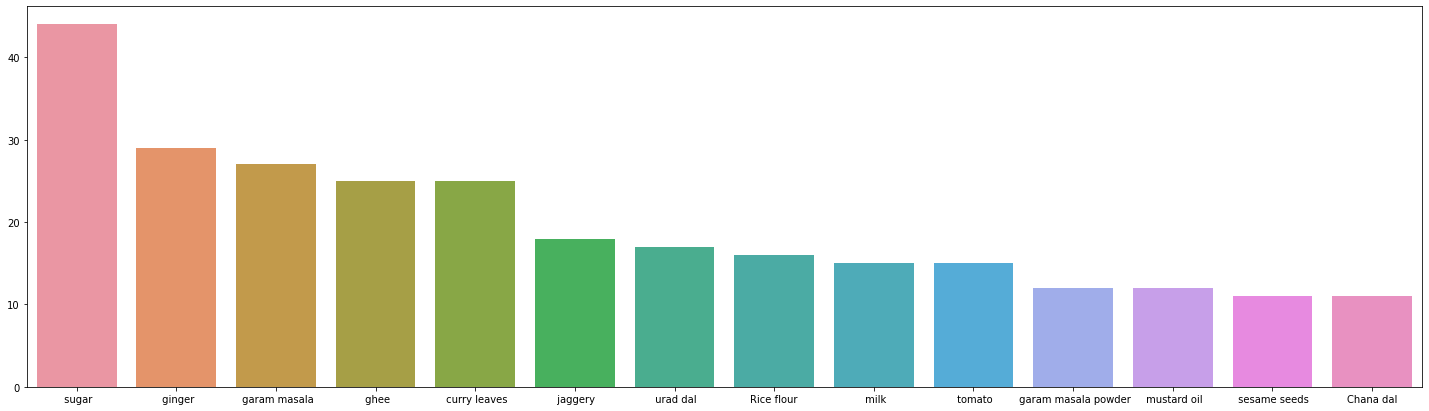

In [ ]:
f, ax = plt.subplots(figsize=(25,7))
sns.barplot(ingredients.index, ingredients.values)

We see that sugar is the most used ingredient in the dishes in the
Indian cuisine ,i.e , it is use in 44 dishes in the data set.


Analysis of the categorical features
1. Diet

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



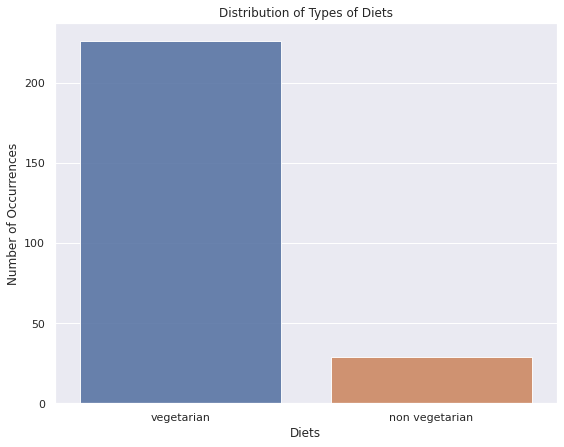

In [ ]:

# Number of dishes that are vgetarians and the non-vegeterians using barplot
carrier_count = df['diet'].value_counts()
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(9,7))
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Distribution of Types of Diets')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Diets', fontsize=12)
plt.show()

In [ ]:
#Percentage of veg and non veg dishes using pie chart
pie_df = df.diet.value_counts().reset_index()
pie_df.columns = ['diet', 'count']
fig = px.pie(pie_df, values='count', names='diet', title='pie chart of different diet')
fig.show()

We see that most dishes in Indian cuisine, i.e, about 89% of them
are vegetarian. Only 11% of the dishes are non vegetarian.

2. Flavour Profiles
# Number of dishes in different flavour profiles

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



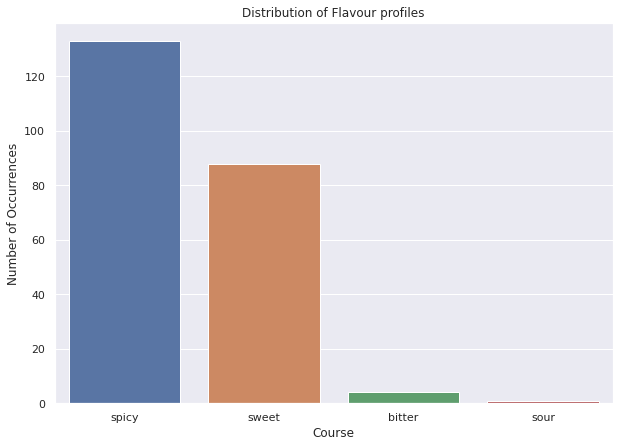

In [ ]:

carrier_count = df['flavor_profile'].value_counts()
f, ax = plt.subplots(figsize=(10,7))
sns.barplot(carrier_count.index, carrier_count.values)
plt.title('Distribution of Flavour profiles')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Course', fontsize=12)
plt.show()


In [ ]:
#Percentage of different flavour profiles using pie chart
pie_df = df.flavor_profile.value_counts().reset_index()
pie_df.columns = ['flavor_profile', 'count']
fig = px.pie(pie_df, values='count', names='flavor_profile', title='pie chart of different flavour profiles')
fig.show()

We see that most dishes in Indian cuisine, i.e, about 59% of them
are spicy ; 39% of them are sweet ; 2% of them are bitter while only about 1%
of the dishes are sour.

3. Courses
# Number of dishes in the different courses

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



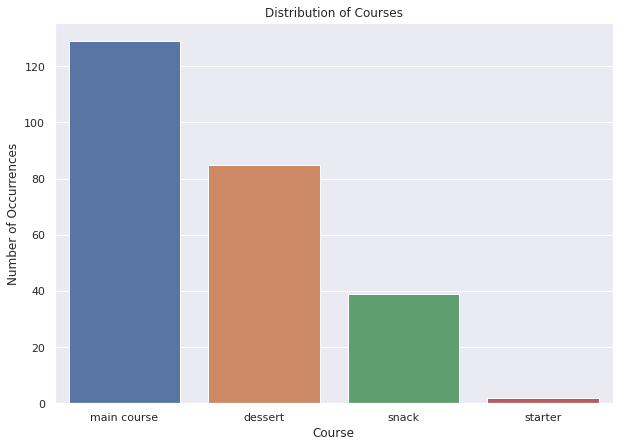

In [ ]:
carrier_count = df['course'].value_counts()
f, ax = plt.subplots(figsize=(10,7))
sns.barplot(carrier_count.index, carrier_count.values)
plt.title('Distribution of Courses')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Course', fontsize=12)
plt.show()

In [ ]:
#Percentage of different flavour profiles using pie chart
pie_df = df.course.value_counts().reset_index()
pie_df.columns = ['course', 'count']
fig = px.pie(pie_df, values='count', names='course', title='pie chart of different courses')
fig.show()

We see that most dishes in Indian cuisine, i.e, about 51% of them
are main course dishes; 34% of them are deserts ; 16%% of them are snacks
while only about 1% of the dishes are starters.

4. State
# Number of dishes from each state

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



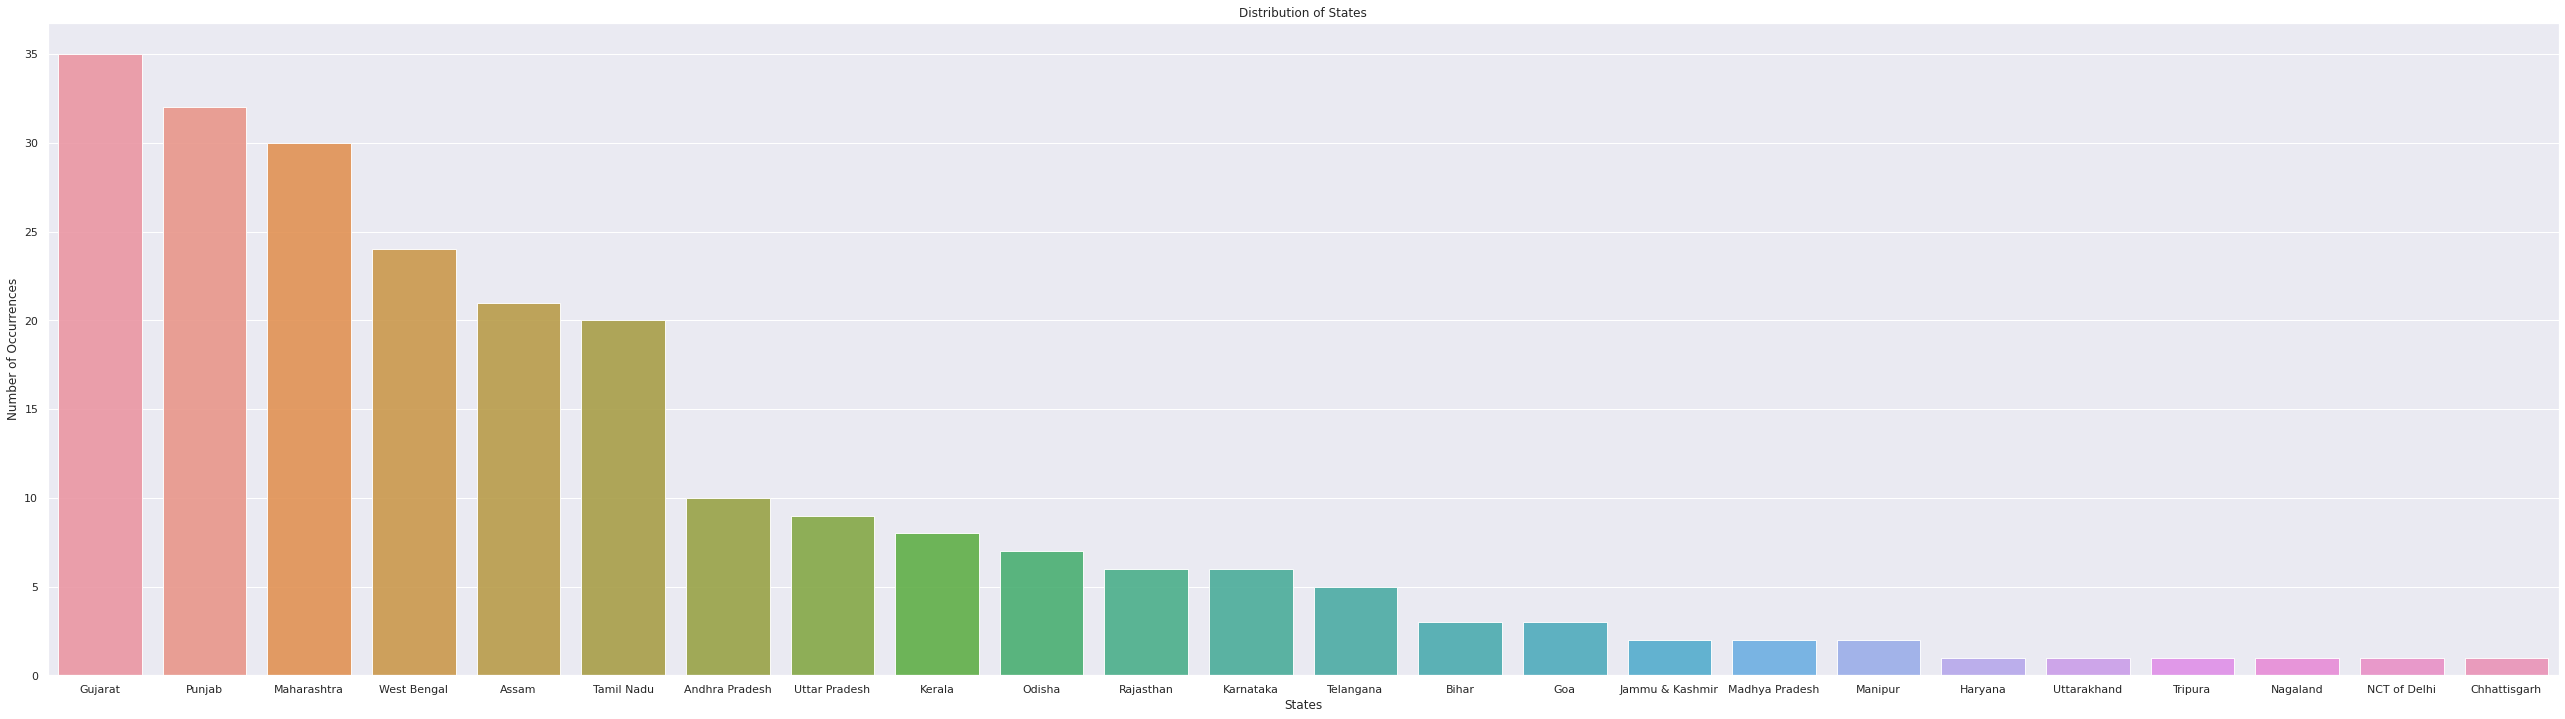

In [ ]:
carrier_count = df['state'].value_counts()
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(45,12))
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Distribution of States')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.show()

In [ ]:
#Percentage of different states using pie chart
pie_df = df.state.value_counts().reset_index()
pie_df.columns = ['state', 'count']
fig = px.pie(pie_df, values='count', names='state', title='pie chart of different states')
fig.show()

We see that most dishes in Indian cuisine data set , i.e, about 15%%
of them are from Gujrat .

In [ ]:
# Displays the number of dishes originating from Gujrat
d=df[df['state']=='Gujarat'][['name','diet','flavor_profile']]
d


,name,diet,flavor_profile
56,Basundi,vegetarian,sweet
58,Doodhpak,vegetarian,sweet
168,Saath,vegetarian,spicy
169,Bajri no rotlo,vegetarian,spicy
174,Chevdo,vegetarian,spicy
175,Chorafali,vegetarian,spicy
176,Copra paak,vegetarian,NaN
177,Daal Dhokli,vegetarian,spicy
178,Kutchi dabeli,vegetarian,spicy
181,Dhokla,vegetarian,spicy


5. Region
#Number of dishes from every region

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



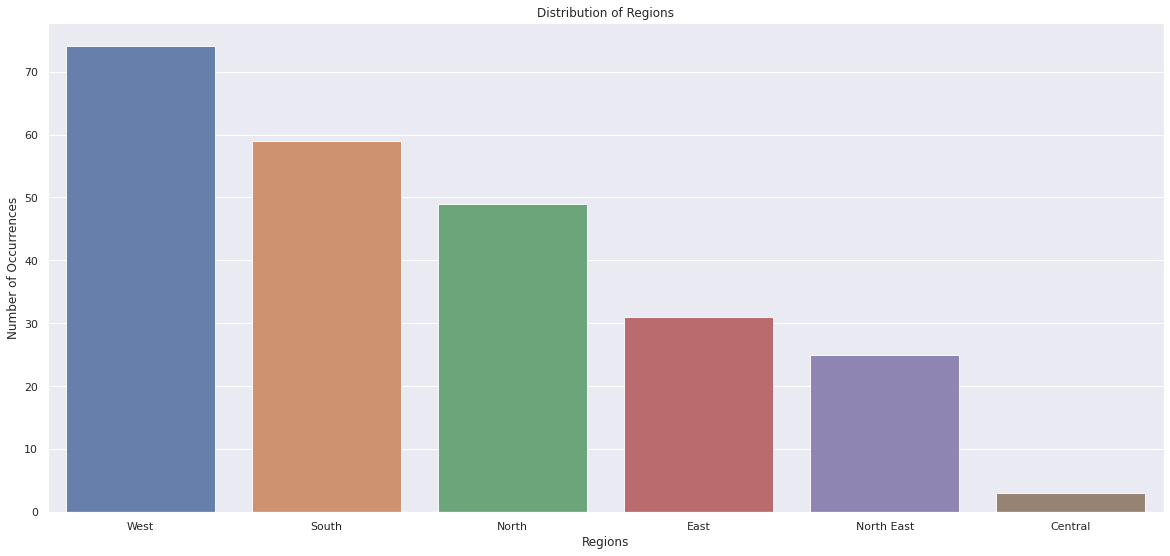

In [ ]:
carrier_count = df['region'].value_counts()
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(20,9))
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Distribution of Regions')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Regions', fontsize=12)
plt.show()

In [ ]:
#Percentage of different states using pie chart
pie_df = df.region.value_counts().reset_index()
pie_df.columns = ['region', 'count']
fig = px.pie(pie_df, values='count', names='region', title='pie chart of different regions')
fig.show()

We see that most dishes in Indian cuisine data set , i.e, about 31%
of them are from Western region of India .

Analysis of relationship between categorical features
1. Analysis for all the different regions

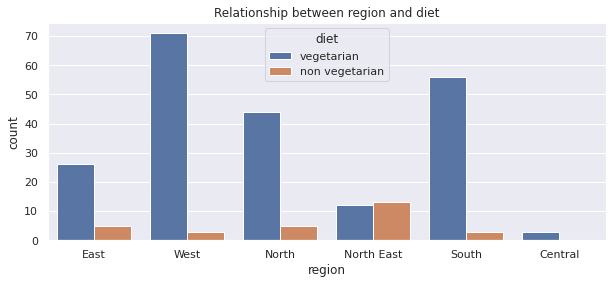

In [ ]:
#Relationship between region and diet
fig, axes = plt.subplots(figsize=(10, 4))
sns.countplot(x='region', hue='diet', data=df)
axes.set_title('Relationship between region and diet')
plt.show()

We see that :
1)More of vegetarian food is eaten in the western and southern parts of India
2)More of non vegetarian food is eaten in the North East parts of India
3) In the Central region only Vegetarian food is eaten


In [ ]:
#Relationship between flavour profile and region

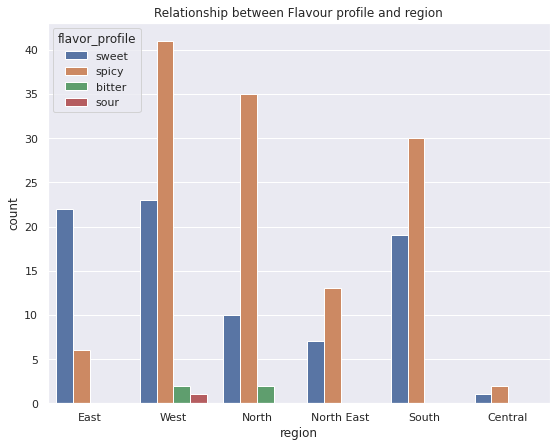

In [ ]:
fig, axes = plt.subplots(figsize=(9,7))
sns.countplot(x='region', hue='flavor_profile', data=df)
axes.set_title('Relationship between Flavour profile and region')
plt.show()

Inference:
1)In most of the regions spicy flavour is the most prefered.
2) Most number of spicy and sweet dishes come from the western region.
3)In the Eastern regions sweet flavour is more prefered.
4)Sour dishes are found to come from the western region only.


2. Analysis for all different states
#Relationship between state and diet

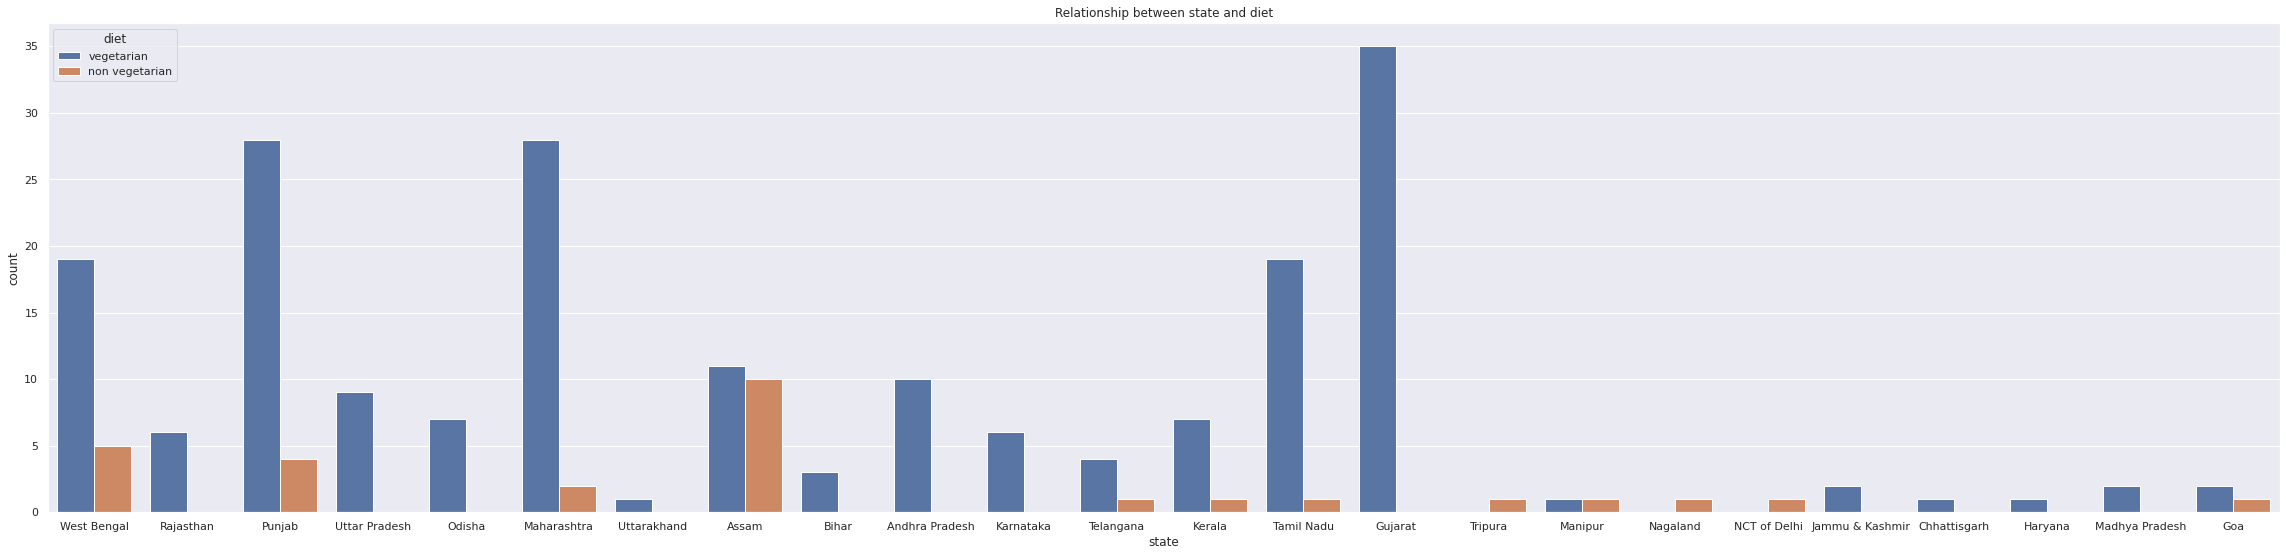

In [ ]:
fig, axes = plt.subplots(figsize=(40, 9))
sns.countplot(x='state', hue='diet', data=df)
axes.set_title('Relationship between state and diet')
plt.show()

Inference:
1) States like Gujrat, Andhra Pradesh ,Karnataka, Uttar Pradesh , Odisha , J&K ,
Haryana , Chattisgarh,Madhya Pradesh , Rajasthan and Bihar have only vegetar
ian food .
2) Most number of vegetarian dishes come from Gujrat
3) States like Tripura , Delhi and Nagaland have only non vegetarian food.
4) Most number of non vegetarian dishes come from Assam
5) Others have both non veg and veg food.


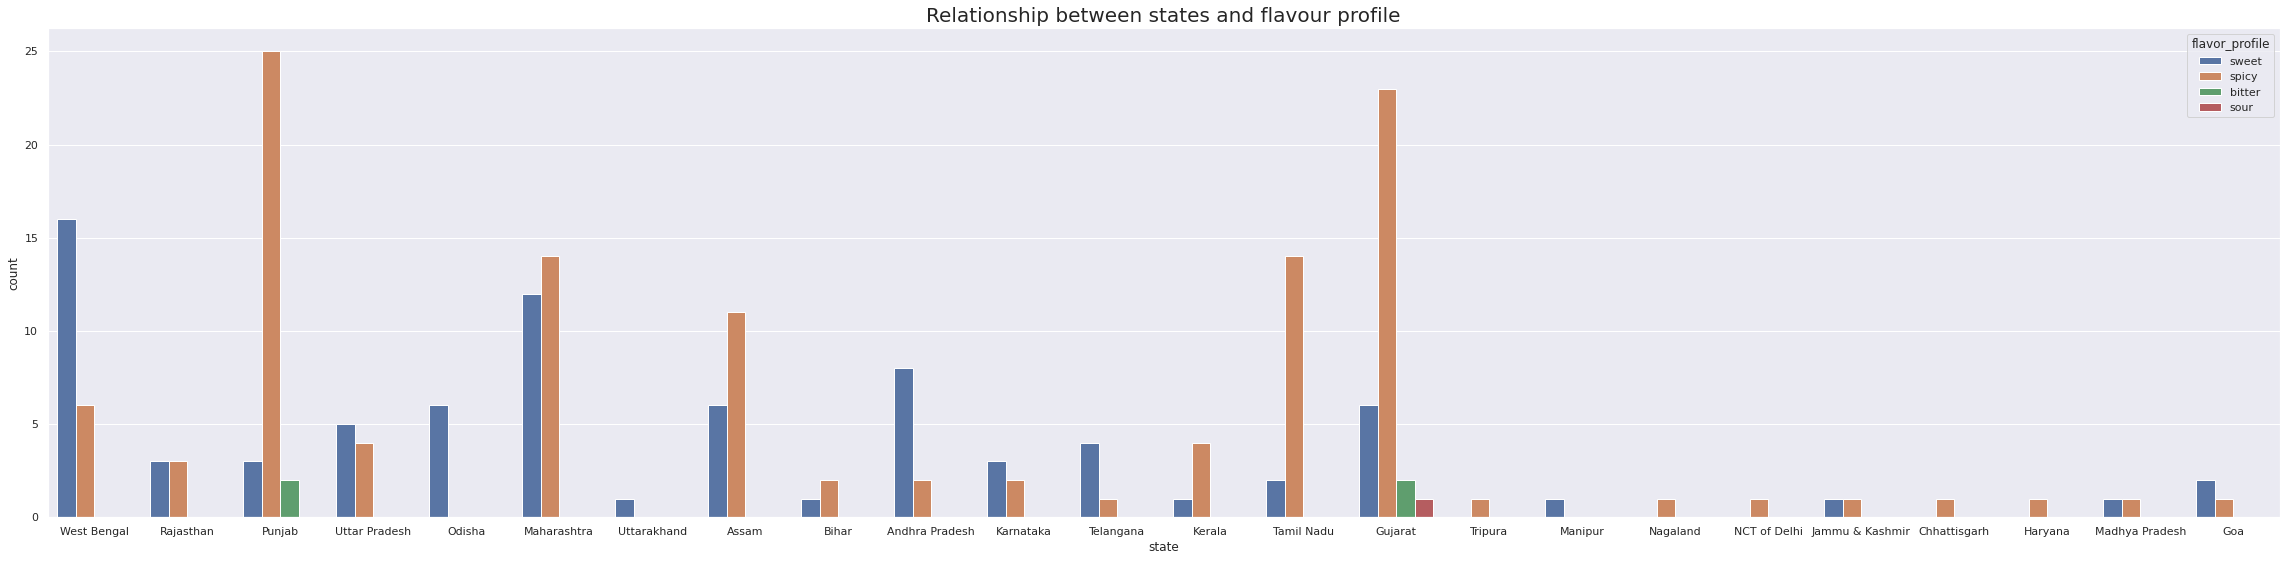

In [ ]:
#Relationship between states and flavour profile
fig, axes = plt.subplots(figsize=(40,9))
sns.countplot(x='state', hue='flavor_profile', data=df)
axes.set_title('Relationship between states and flavour profile',fontsize=20)
plt.show()


Inference:
1) Most number of spicy dishes come from Punjab.
2)Most number of sweet dishes come from West Bengal.
3) More number of bitter dishes come from Gujrat
4)Sour dishes are only originating from Gujrat

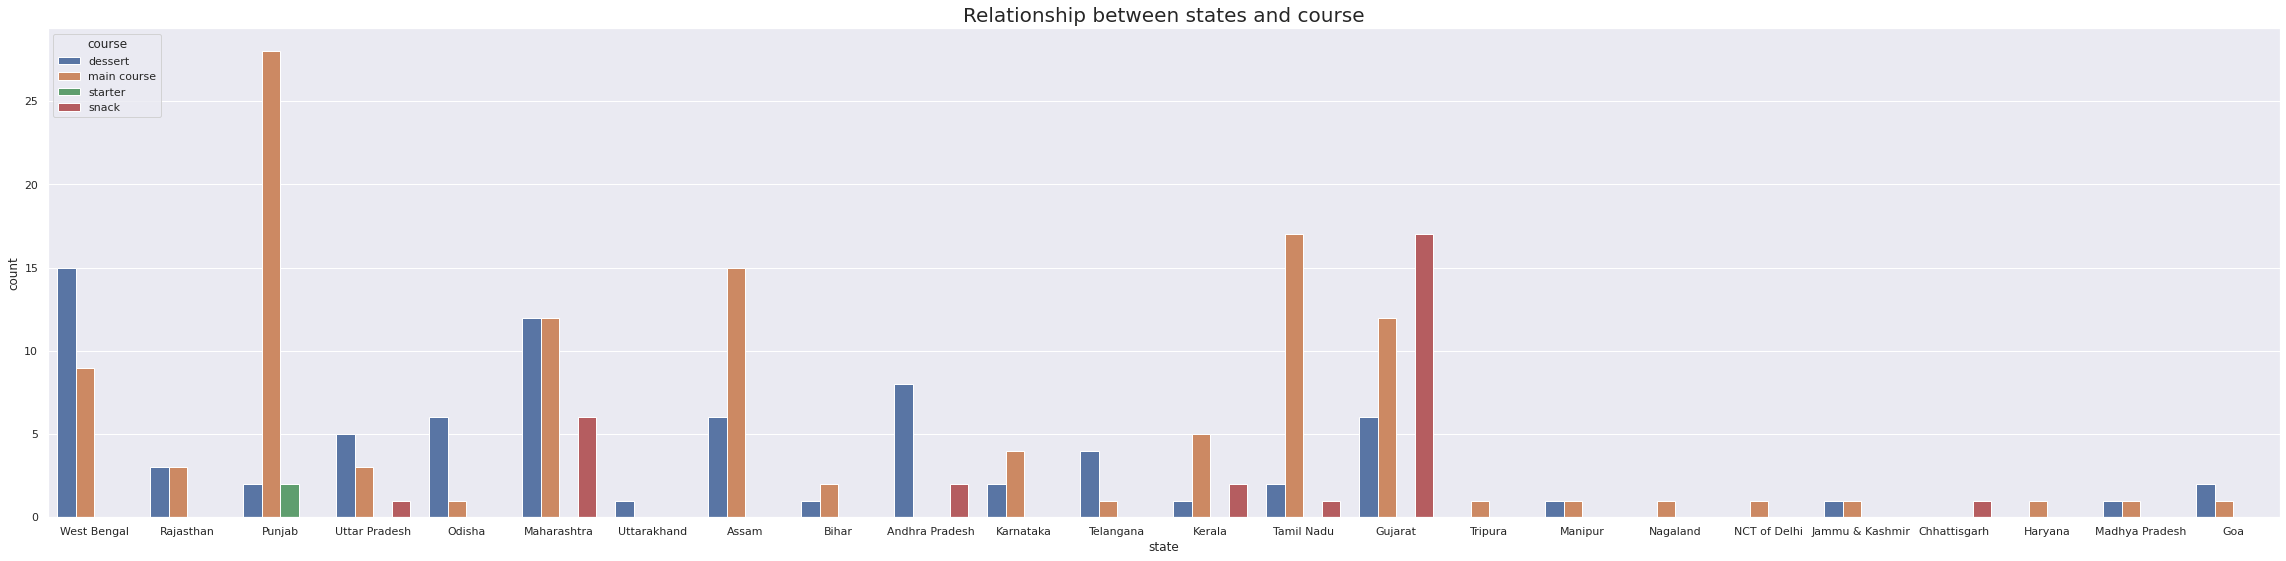

In [ ]:
#Relationship between states and courses
fig, axes = plt.subplots(figsize=(40,9))
sns.countplot(x='state', hue='course', data=df)
axes.set_title('Relationship between states and course',fontsize=20)
plt.show()

Inference:
1)Most main course dishes come from Punjab
2)Starters are also only from punjab
3)Deserts from West Baengal are more in number
4) Most number of snacks also come from Gujrat


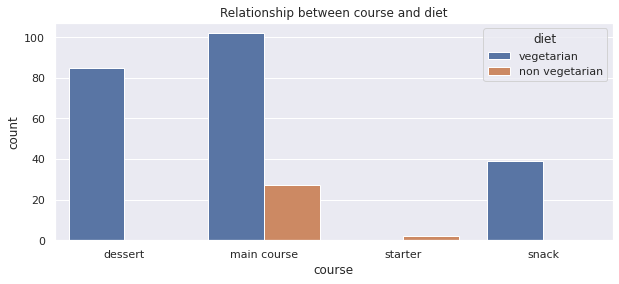

In [ ]:
#Relationship between course and diet
fig, axes = plt.subplots(figsize=(10, 4))
sns.countplot(x='course', hue='diet', data=df)
axes.set_title('Relationship between course and diet')
plt.show()


Inference: We see that:
1) Deserts and snacks consist of only vegetarian food
2) Main course consists mostly of vegetarian food
3) Starters consist of only non vegetarian food

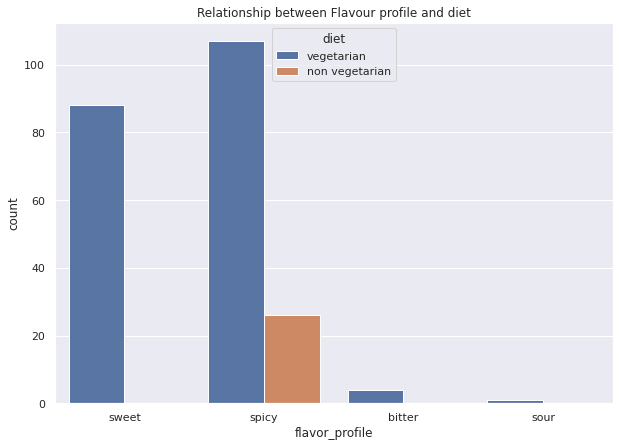

In [ ]:
#Relationship between flavour profile and diet
fig, axes = plt.subplots(figsize=(10,7))
sns.countplot(x='flavor_profile', hue='diet', data=df)
axes.set_title('Relationship between Flavour profile and diet')
plt.show()

Inference:
1) Dishes of sweet, sour and bitter flavours are completly vegetarian
2) There are more vegetarian spicy dishes than there are non vegetarian

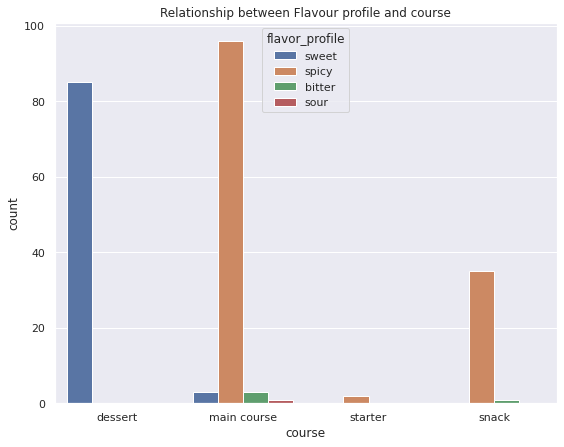

In [ ]:
#Relationship between flavour profile and course
fig, axes = plt.subplots(figsize=(9,7))
sns.countplot(x='course', hue='flavor_profile', data=df)
axes.set_title('Relationship between Flavour profile and course')
plt.show()

Inference:
1)Most of the main course dishes and snacks are spicy
2) The starters consist of only spicy dishes
3) Bitter and sour dishes are found in the maincourse only

In [ ]:
# Snack that is bitter
d=df[(df['flavor_profile']=='bitter') & (df['course']=='snack') ]
d


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Number_of_ingredients,totaltime
198,Muthiya,"Bottle gourd, whole wheat flour, rava, sesame ...",vegetarian,15.0,30.0,bitter,snack,Gujarat,West,5,45.0


In [ ]:
#Inference:
#The snack that is bitter is Muthiya that comes from Gujrat

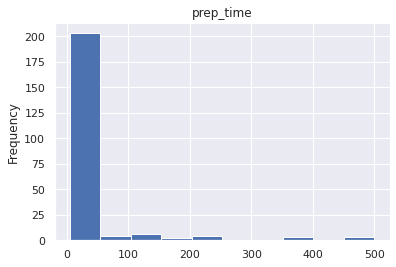

In [ ]:
#Analysis of preparation time , cooking time
#Histogram for preparation time - the number of dishes taking different ranges of the preparation time
fig, axes = plt.subplots()
axes.set_title('prep_time')
df.prep_time.plot(kind='hist')

In [ ]:
#Inference: We can say that most dishes require a preparation time between 10 to 50 mins.

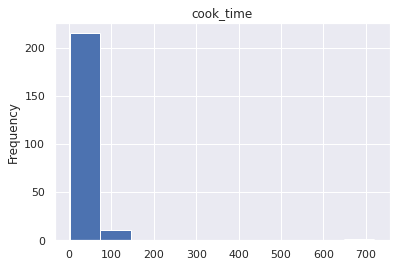

In [ ]:
#Histogram for cooking time - the number of dishes taking different ranges of the cooking time
fig1, ax1 = plt.subplots()
ax1.set_title('cook_time')
df.cook_time.plot(kind='hist')

In [ ]:
#Inference: We can say that most dishes require a cooking time between 0 to 70 mins.

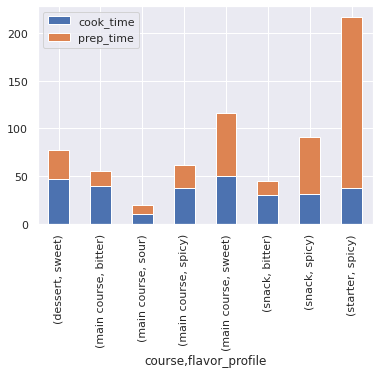

In [ ]:
# Comparision of cooking time and preparation time for dishes of certain course and certain flavour profile
course_flavour=df.pivot_table(values=['prep_time','cook_time'],index=['course','flavor_profile'],aggfunc=np.mean)
course_flavour.plot(kind='bar',stacked=True)

Inference:
1) In main course:
i. The sweet flavoured dishes take longer to be prepared than to be cooked
ii. The bitter and the spicy dishes take longer to be cooked than to be prpared
2)In snacks:
i. The bitter snacks take longer to be cooked.
ii. The spicy snacks take longer to be prepared for.

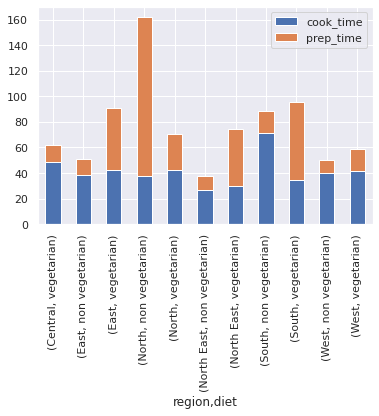

In [ ]:
# Comparision of cooking time and preparation time for dishes from certain state and of certain diet
region_diet=df.pivot_table(values=['prep_time','cook_time'],index=['region','diet'],aggfunc=np.mean)
region_diet.plot(kind='bar',stacked=True)

Inference:
1)In the North non vegetarian dishes take longer time for their preparation tha
n the vegetarian ones while the vegetarian dishes take longer to be cooked
2) In the south non vegetarian dishes take longer to be cooked than the veg on
es while the vegetarian dishes take longer to be prepared for
3)In the eastern region both take almost equal time to be cooked but the veg d
ishes take longer to be prepared for.
4)In the west the preparation and cooking time for both is almost equal


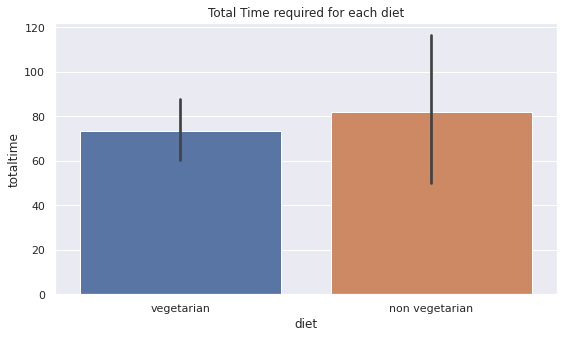

In [ ]:
#Analysis of total time taken
#Total time taken to make every diet
fig, axes = plt.subplots(figsize=(9,5))
sns.barplot(x='diet', y='totaltime',data=df)
plt.title('Total Time required for each diet')
plt.show()

Inference : We see that non vegetarian food takes longer to be made than veg
etarian food.


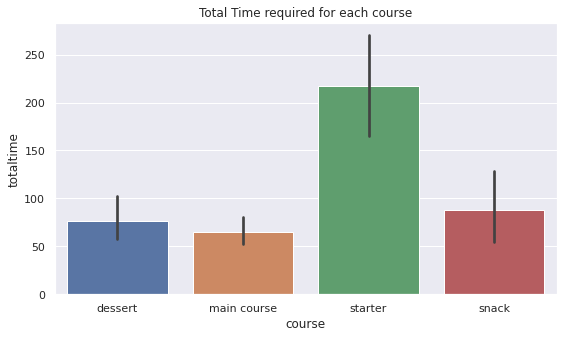

In [ ]:
#Total time taken to make every course
fig, axes = plt.subplots(figsize=(9,5))
sns.barplot(x='course', y='totaltime',data=df)
plt.title('Total Time required for each course')
plt.show()

Inference : We see that the total time taken to make starters is longer than
the time taken to make any other course.

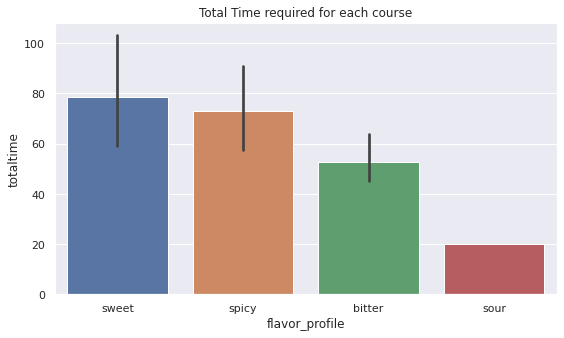

In [ ]:
#Total time taken to make every flavour profile
fig, axes = plt.subplots(figsize=(9,5))
sns.barplot(x='flavor_profile', y='totaltime',data=df)
plt.title('Total Time required for each course')
plt.show()

Inference: We see that it takes longer time to prepare sweet flavoured dishes t
han compared to other

In [ ]:
# Top 10 dishes in maincourse that take maximum totaltime
d=df[df['course']=='main course']
r=d.sort_values(['totaltime'],ascending= False)
r.head(10) 

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Number_of_ingredients,totaltime
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500.0,120.0,spicy,main course,Punjab,North,5,620.0
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495.0,40.0,NaN,main course,Kerala,South,3,535.0
122,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari...",non vegetarian,240.0,30.0,spicy,main course,Punjab,North,5,270.0
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180.0,60.0,sweet,main course,Karnataka,South,7,240.0
157,Sandige,"Thin rice flakes, black sesame seeds, curry le...",vegetarian,120.0,60.0,NaN,main course,Karnataka,South,3,180.0
158,Sevai,"Sevai, parboiled rice, steamer",vegetarian,120.0,30.0,NaN,main course,NaN,South,3,150.0
75,Biryani,"Chicken thighs, basmati rice, star anise, swee...",non vegetarian,30.0,120.0,spicy,main course,Telangana,South,5,150.0
99,Litti chokha,"Wheat flour, roasted gram flour, tomato, nigel...",vegetarian,45.0,60.0,spicy,main course,Bihar,North,5,105.0
115,Rajma chaval,"Red kidney beans, garam masala powder, ginger,...",vegetarian,15.0,90.0,spicy,main course,NaN,North,5,105.0
83,Daal baati churma,"Moong dal, masoor dal, chana dal, wheat flour,...",vegetarian,10.0,90.0,spicy,main course,Rajasthan,West,5,100.0


Inference :
Pindi Channa is the maincourse dish that takes the longest to be made

In [ ]:
# Top 10 dishes in sweet flavour that take maximum totaltime
d=df[df['flavor_profile']=='sweet']
s=d.sort_values(['totaltime'],ascending= False)
s.head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Number_of_ingredients,totaltime
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10.0,720.0,sweet,dessert,Maharashtra,West,4,730.0
29,Misti doi,"Milk, jaggery",vegetarian,480.0,30.0,sweet,dessert,West Bengal,East,2,510.0
48,Poornalu,"Chana dal, jaggery",vegetarian,240.0,60.0,sweet,dessert,Andhra Pradesh,South,2,300.0
66,Chak Hao Kheer,"Rice, milk, sugar, cardamom",vegetarian,240.0,45.0,sweet,dessert,Manipur,North East,4,285.0
33,Ras malai,"Chhena, reduced milk, pistachio",vegetarian,180.0,60.0,sweet,dessert,West Bengal,East,3,240.0
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180.0,60.0,sweet,main course,Karnataka,South,7,240.0
27,Malapua,"Yoghurt, refined flour, ghee, fennel seeds",vegetarian,10.0,120.0,sweet,dessert,Bihar,North,4,130.0
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,3,110.0
23,Cham cham,"Flour, cream, sugar, saffron, lemon juice, coc...",vegetarian,40.0,60.0,sweet,dessert,West Bengal,East,6,100.0
34,Rasgulla,"Chhena, sugar, cardamom",vegetarian,10.0,90.0,sweet,dessert,West Bengal,East,3,100.0


Inference:
Shrikhand is the sweet flavoured dish that takes the longest to be made

In [ ]:
# Top 10 dishes with maximum total time in the entire dataset
df.nlargest(10,'totaltime')

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Number_of_ingredients,totaltime
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10.0,720.0,sweet,dessert,Maharashtra,West,4,730.0
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500.0,120.0,spicy,main course,Punjab,North,5,620.0
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495.0,40.0,NaN,main course,Kerala,South,3,535.0
29,Misti doi,"Milk, jaggery",vegetarian,480.0,30.0,sweet,dessert,West Bengal,East,2,510.0
128,Dosa,"Chana dal, urad dal, whole urad dal, blend ric...",vegetarian,360.0,90.0,spicy,snack,NaN,South,5,450.0
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360.0,90.0,spicy,snack,NaN,South,5,450.0
144,Masala Dosa,"Chana dal, urad dal, potatoes, idli rice, thic...",vegetarian,360.0,90.0,spicy,snack,NaN,South,5,450.0
48,Poornalu,"Chana dal, jaggery",vegetarian,240.0,60.0,sweet,dessert,Andhra Pradesh,South,2,300.0
66,Chak Hao Kheer,"Rice, milk, sugar, cardamom",vegetarian,240.0,45.0,sweet,dessert,Manipur,North East,4,285.0
122,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari...",non vegetarian,240.0,30.0,spicy,main course,Punjab,North,5,270.0


Inference:
Shrikhand also takes the longest to be made from all the dishes in the data

In [ ]:
# Top 10 dishes with minimum total time in the entire dataset
df.nsmallest(10,'totaltime')

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Number_of_ingredients,totaltime
11,Lassi,"Yogurt, milk, nuts, sugar",vegetarian,5.0,5.0,sweet,dessert,Punjab,North,4,10.0
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5.0,5.0,spicy,snack,NaN,NaN,4,10.0
147,Papadum,"Lentils, black pepper, vegetable oil",vegetarian,5.0,5.0,spicy,snack,Kerala,South,3,10.0
214,Khichu,"Rice flour, sesame seeds, baking soda, peanut oil",vegetarian,5.0,10.0,spicy,snack,Gujarat,West,4,15.0
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15.0,2.0,spicy,snack,NaN,NaN,5,17.0
67,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5.0,15.0,spicy,main course,Nagaland,North East,6,20.0
78,Chapati,"Whole wheat flour, olive oil, hot water, all p...",vegetarian,10.0,10.0,NaN,main course,Maharashtra,West,4,20.0
169,Bajri no rotlo,"Wheat flour, pearl millet flour, hot water",vegetarian,10.0,10.0,spicy,main course,Gujarat,West,3,20.0
175,Chorafali,"Urad dal, bengal gram flour, dried mango, baki...",vegetarian,5.0,15.0,spicy,snack,Gujarat,West,5,20.0
190,Keri no ras,"Mango, sugar",vegetarian,10.0,10.0,sour,main course,Gujarat,West,2,20.0


nference : Lassi, Pappad, Pappadum are the dishes that take the least time
that is 10 mins to be made in made in total

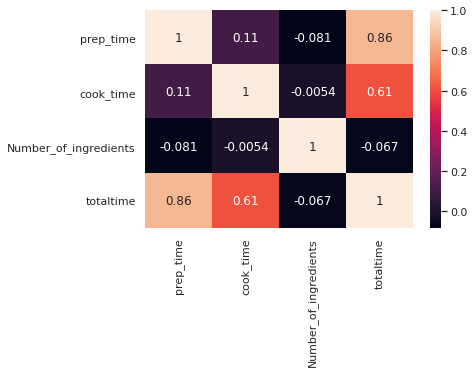

In [ ]:
#Heatmap to the show the relation between the numeric variables. These would help to make the model based om the eda going further
sns.heatmap(df.corr(),annot=True)

Conclusion:
Here we have completed the EDA.
After having done the EDA we come to know the the distribution of various
dishes through out the various states of the country and regions, as well as the
total time taken to prepare it, the ingredients used in making them and their
flavour profiles.
Using this we can then build a model for an Indian food recommendation system
at any restaurants or food delivery applications using the features total time,
number of ingredients used, flavour profile and type of diet as primary
determinants or filters.